In [19]:
import numpy as np             
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns          
#import sklearn  
import pickle

# Классификация рака

Поставлена следующая задача классификации: необходимо предсказать тип рака пациента на основе уровня метилирования ДНК (бета-значений).

## 1. Загрузка данных

Загрузим два файла. Первый файл содержит информацию о клинических данных пациентов. Второй файл содежит в себе данные бета-значений CpG сайтов каждого пациента.  

### Загрузка клинических данных

Таблица содержит клинические данные 9748 пациентов. Для каждого пациента есть информация о возрасте, расе, гендере, статусе, тип рака и др. 

In [21]:
dfDataClinic = pd.DataFrame()
fnameDataClinic = 'D:/Nerobova_Anastasiya/ML/InfoClinicData.pkl'

with open(fnameDataClinic, 'rb') as handle:
    dfDataClinic = pickle.load(handle)

dfDataClinic.head()

,id_person,days_to_birth,days_to_last_followup,race_list,icd_10,other_dx,icd_o_3_site,icd_o_3_histology,vital_status,project,...,bcr_patient_barcode,additional_studies,year_of_form_completion,history_of_neoadjuvant_treatment,tissue_source_site,has_drugs_information,has_follow_ups_information,ethnicity,bcr_patient_uuid,patient_id
0,TCGA-OR-A5LH-01A-11D-A29J-05,-13182.0,NaN,WHITE,C74.0,No,C74.0,8370/3,Dead,TCGA-ACC,...,TCGA-OR-A5LH,NaN,2013,No,OR,NO,NO,NOT HISPANIC OR LATINO,CF327482-199B-4604-AC19-C8B68D91C5D9,A5LH
1,TCGA-OR-A5LG-01A-11D-A29J-05,-16875.0,1589.0,WHITE,C74.0,No,C74.0,8370/3,Alive,TCGA-ACC,...,TCGA-OR-A5LG,NaN,2013,No,OR,NO,NO,NOT HISPANIC OR LATINO,FAD4B7E6-510C-4968-83DF-3140ED5A0549,A5LG
2,TCGA-OR-A5JQ-01A-11D-A29J-05,-9667.0,674.0,WHITE,C74.0,No,C74.0,8370/3,Alive,TCGA-ACC,...,TCGA-OR-A5JQ,NaN,2013,No,OR,NO,YES,NaN,199560CB-15E5-4276-865A-7D44D47C856C,A5JQ
3,TCGA-OR-A5J6-01A-31D-A29J-05,-10839.0,2428.0,BLACK OR AFRICAN AMERICAN,C74.0,No,C74.0,8370/3,Alive,TCGA-ACC,...,TCGA-OR-A5J6,NaN,2013,No,OR,NO,YES,HISPANIC OR LATINO,C8898B42-B704-45A0-9829-144B98F416E0,A5J6
4,TCGA-OR-A5L6-01A-11D-A29J-05,-22057.0,628.0,WHITE,C74.0,No,C74.0,8370/3,Alive,TCGA-ACC,...,TCGA-OR-A5L6,NaN,2013,No,OR,NO,YES,NOT HISPANIC OR LATINO,F13A3D5E-7F8E-4ACB-AD46-F6380A9443E8,A5L6


Каждая строка соответствует пациенту, а каждый столбец соответствует конкретной характеристике:

In [4]:
dfDataClinic.shape

(9748, 26)

In [5]:
dfDataClinic.columns

Index(['id_person', 'days_to_birth', 'days_to_last_followup', 'race_list',
       'icd_10', 'other_dx', 'icd_o_3_site', 'icd_o_3_histology',
       'vital_status', 'project', 'day_of_form_completion', 'gender',
       'has_radiations_information', 'days_to_death',
       'informed_consent_verified', 'month_of_form_completion',
       'bcr_patient_barcode', 'additional_studies', 'year_of_form_completion',
       'history_of_neoadjuvant_treatment', 'tissue_source_site',
       'has_drugs_information', 'has_follow_ups_information', 'ethnicity',
       'bcr_patient_uuid', 'patient_id'],
      dtype='object')

Характеристики: 

 - id_person - id пациента в таблице
 - days_to_birth - дней до дня рождения
 - days_to_last_followup - дней до последнего наблюдения
 - race_list - раса пациента
 - icd_10 - международная статистическая классификация болезней
 - other_dx - иная информация
 - icd_o_3_site - Международная классификация онкологических заболеваний (ICD-O) (сайт)
 - icd_o_3_histolog - Международная классификация онкологических заболеваний (ICD-O) (гистология)
 - vital_status - жизненный статус
 - project - тип рака пациента
 - gender - гендер
 - has_radiations_information - была ли лучевая (радио-) терапия
 - days_to_death - дней до смерти
 - informed_consent_verified - согласие подтверждено 
 - day_of_form_completion - день заполнения формы
 - month_of_form_completion - месяц заполнения формы
 - year_of_form_completion - год заполнения формы
 - bcr_patient_barcode - сокращенный id пациента
 - additional_studies - дополнительные исследования
 - history_of_neoadjuvant_treatment - история неоадъювантного лечения (хим терапия)
 - tissue_source_site - сайт источника ткани
 - has_drugs_information - есть ли информация о принимаемых лекарственных средств
 - has_follow_ups_information - есть последующая информация (о пациенте)
 - ethnicity - этническая принадлежность
 - patient_id - id пацента внутри типа рака
 

Посмотрим, какой тип данных имеет каждая характеристика.

In [9]:
dfDataClinic.dtypes

id_person                            object
days_to_birth                       float64
days_to_last_followup               float64
race_list                            object
icd_10                               object
other_dx                             object
icd_o_3_site                         object
icd_o_3_histology                    object
vital_status                         object
project                              object
day_of_form_completion              float64
gender                               object
has_radiations_information           object
days_to_death                       float64
informed_consent_verified            object
month_of_form_completion              int64
bcr_patient_barcode                  object
additional_studies                   object
year_of_form_completion               int64
history_of_neoadjuvant_treatment     object
tissue_source_site                   object
has_drugs_information                object
has_follow_ups_information      

### Загрузка данных бета-значений 

Бета-значения - доля метилированных сайтов. Метилирование ДНК заключается в присоединении метильной группы к цитозину в составе CpG-динуклеотида в позиции С5 цитозинового кольца.

In [2]:
dfDataBeta = pd.DataFrame()
fnameDataBeta = 'D:/Nerobova_Anastasiya/RStudio/MatrixCpGAllCancer.pkl'

with open(fnameDataBeta, 'rb') as handle:
    dfDataBeta = pickle.load(handle)

dfDataBeta.head()

CpG,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
TCGA-OR-A5LH-01A-11D-A29J-05,0.127235,NaN,NaN,0.798976,0.906222,0.724104,0.406815,0.202612,0.151666,0.013125,...,0.791231,0.014351,0.123524,0.971234,0.522766,0.051763,0.861380,0.307426,0.119247,0.941517
TCGA-OR-A5LG-01A-11D-A29J-05,0.046121,NaN,NaN,0.067993,0.893865,0.754962,0.857653,0.865786,0.560898,0.013004,...,0.461214,0.013948,0.900690,0.976762,0.017721,0.606996,0.972568,0.030855,0.072948,0.669205
TCGA-OR-A5JQ-01A-11D-A29J-05,0.602064,NaN,NaN,0.100943,0.897362,0.614677,0.877027,0.255339,0.714194,0.014641,...,0.020769,0.013826,0.909073,0.256746,0.969041,0.249980,0.512725,0.354050,0.152047,0.942741
TCGA-OR-A5J6-01A-31D-A29J-05,0.117144,NaN,NaN,0.115994,0.413085,0.584756,0.782867,0.825748,0.123553,0.013132,...,0.469062,0.973064,0.912584,0.436507,0.445958,0.546527,0.676457,0.040208,0.938875,0.137452
TCGA-OR-A5L6-01A-11D-A29J-05,0.264575,NaN,NaN,0.143594,0.892213,0.717910,0.834388,0.862202,0.881404,0.014424,...,0.968430,0.015532,0.896062,0.014142,0.459246,0.935251,0.030863,0.030264,0.056576,0.905967


Каждая строка в таблице соответствует пациенту, а каждый столбец соответствует конкретному CpG сайту

In [8]:
dfDataBeta.shape

(9748, 485577)

Т.к. признаков очень много (485577), необходимо сделать уменьшение размерности (или редукцию размерности)

## 2. Визуализация данных и вычисление основых характеристик

Получим сводную информацию о количественных признаках.

Т.к. CpG сайтов ~450к, будет весь затруднительно все обработать, поэтому возьмем несколько CpG сайтов.

In [12]:
columns = ['cg00000029', 'cg00000108', 'cg00000109', 'cg00000165', 'cg00000236',
       'cg00000289', 'cg00000292', 'cg00000321', 'cg00000363', 'cg00000622']

In [14]:
dfDataBeta[columns].describe()

CpG,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622
count,9746.000000,0.0,0.0,9748.000000,9747.000000,9747.000000,9748.000000,9745.000000,9748.000000,9747.000000
mean,0.331596,NaN,NaN,0.390082,0.881746,0.677668,0.660577,0.466339,0.329289,0.014379
std,0.223089,NaN,NaN,0.261075,0.071196,0.103519,0.168706,0.202637,0.217893,0.006703
min,0.035813,NaN,NaN,0.045665,0.086632,0.104821,0.057106,0.034497,0.035311,0.000736
25%,0.147911,NaN,NaN,0.141293,0.872541,0.623659,0.550146,0.305159,0.165500,0.012005
50%,0.271679,NaN,NaN,0.341490,0.897986,0.694406,0.681557,0.466723,0.250149,0.013582
75%,0.464969,NaN,NaN,0.606901,0.915496,0.748891,0.793689,0.619439,0.449545,0.015396
max,0.947553,NaN,NaN,0.959019,0.960861,0.932946,0.956727,0.939265,0.943254,0.291246


Вычислим матрицу корреляции.

In [17]:
corr_mat = dfDataBeta[columns].corr()
corr_mat

CpG,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622
CpG,,,,,,,,,,
cg00000029,1.000000,NaN,NaN,-0.118552,0.025751,0.117378,0.222834,0.201040,0.334843,-0.034423
cg00000108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000165,-0.118552,NaN,NaN,1.000000,0.126820,-0.048773,-0.002710,0.284541,0.146192,0.047209
cg00000236,0.025751,NaN,NaN,0.126820,1.000000,0.336753,0.192695,0.154062,0.088791,-0.076652
cg00000289,0.117378,NaN,NaN,-0.048773,0.336753,1.000000,0.163385,0.113369,0.014826,-0.092143
cg00000292,0.222834,NaN,NaN,-0.002710,0.192695,0.163385,1.000000,0.173535,0.283027,0.024667
cg00000321,0.201040,NaN,NaN,0.284541,0.154062,0.113369,0.173535,1.000000,0.192734,-0.014441
cg00000363,0.334843,NaN,NaN,0.146192,0.088791,0.014826,0.283027,0.192734,1.000000,0.030966


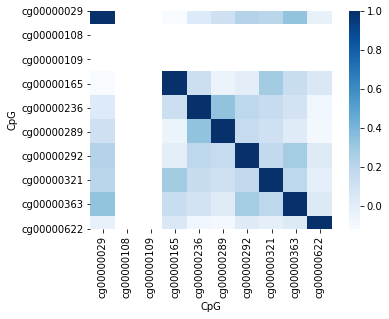

In [20]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')

Как можно увидеть, кореляция в CpG сайтах не наблюдается.

Сделаем тоже самое для клинических данных.

In [21]:
dfDataClinic.describe()

,days_to_birth,days_to_last_followup,day_of_form_completion,days_to_death,month_of_form_completion,year_of_form_completion
count,9644.000000,7724.000000,9694.000000,2113.000000,9748.000000,9748.000000
mean,-21656.138013,688.611082,15.374768,849.779934,6.060936,2012.283135
std,5358.419826,954.419878,8.473379,979.943274,3.360184,1.311789
min,-32873.000000,-64.000000,1.000000,0.000000,1.000000,2008.000000
25%,-25582.000000,89.000000,8.000000,233.000000,3.000000,2011.000000
50%,-22203.500000,305.000000,14.000000,522.000000,6.000000,2012.000000
75%,-18363.750000,935.250000,22.000000,1111.000000,9.000000,2014.000000
max,-5267.000000,10860.000000,31.000000,10870.000000,12.000000,2015.000000


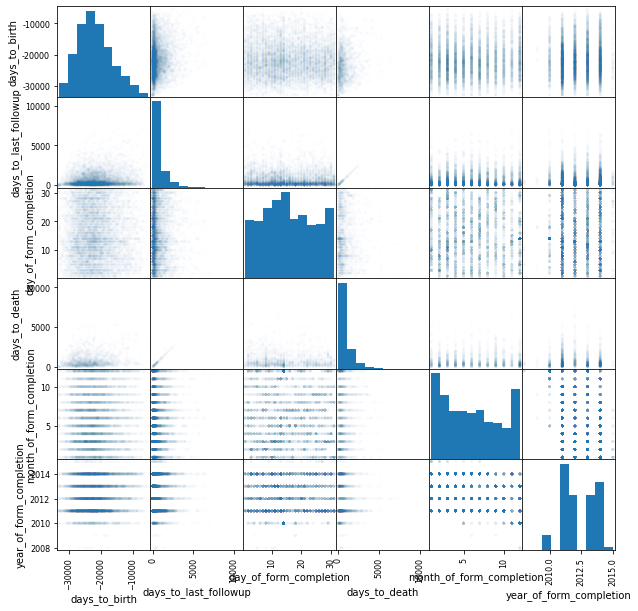

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfDataClinic, alpha = .01, figsize = (10, 10))
pass

Вычислим матрицу корреляции.

In [23]:
corr_mat = dfDataClinic.corr()
corr_mat

,days_to_birth,days_to_last_followup,day_of_form_completion,days_to_death,month_of_form_completion,year_of_form_completion
days_to_birth,1.000000,0.139069,-0.022274,0.196043,0.033291,0.061897
days_to_last_followup,0.139069,1.000000,-0.023240,0.894456,0.037907,0.029254
day_of_form_completion,-0.022274,-0.023240,1.000000,-0.050192,-0.025716,0.022728
days_to_death,0.196043,0.894456,-0.050192,1.000000,0.029728,-0.027346
month_of_form_completion,0.033291,0.037907,-0.025716,0.029728,1.000000,-0.230340
year_of_form_completion,0.061897,0.029254,0.022728,-0.027346,-0.230340,1.000000


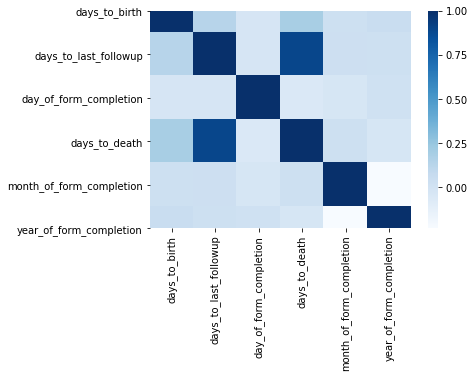

In [24]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')

Можем заметить, что между признаками "days_to_death" (дней со смерти) и "days_to_last_followup" (дней с последнего осмотра) присутствует кореляция.

Построим диаграмму рассеивания для данных признаков:

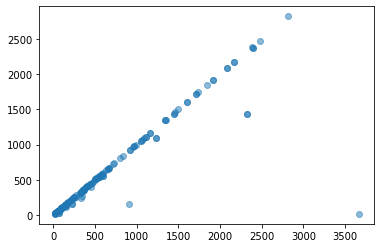

In [25]:
plt.scatter(dfDataClinic['days_to_death'], dfDataClinic['days_to_last_followup'], alpha = 0.5)
pass

Можно заметить, что точки выстроились вдоль прямой, идущей из нижнего левого угла в правый верхний. Таким образом, в некотором приближении зависимость задержки времени прибытия от задержки времени отправления линейная.

 Это можно объяснить тем, у пациент наблюдался в клинике и последний осмотр был незадолго до его смерти.

Рассмотрим соотношение значений для каждого из категориальных признаков:

In [34]:
dfDataClinic['gender'].value_counts()

MALE      5028
FEMALE    4720
Name: gender, dtype: int64

In [31]:
dfDataClinic['gender'].values

array(['FEMALE', 'MALE', 'FEMALE', ..., 'MALE', 'FEMALE', 'MALE'],
      dtype=object)

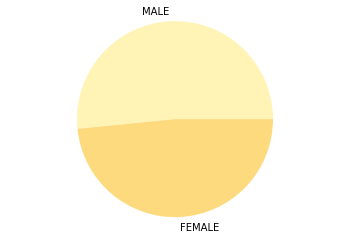

In [53]:
plt.pie(list(dfDataClinic['gender'].value_counts()), labels=['MALE','FEMALE'], colors=sns.color_palette("YlOrBr"))
plt.axis('equal')
plt.show()

In [50]:
dfDataClinic['race_list'].value_counts()

WHITE                                        7567
BLACK OR AFRICAN AMERICAN                     930
ASIAN                                         614
AMERICAN INDIAN OR ALASKA NATIVE               23
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      10
Name: race_list, dtype: int64

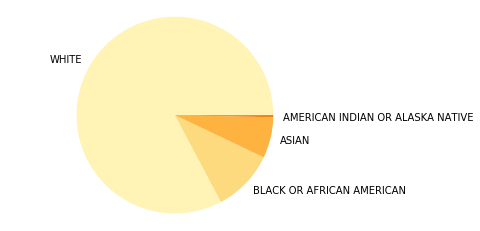

In [55]:
plt.pie(list(dfDataClinic['race_list'].value_counts()), labels=['WHITE', 'BLACK OR AFRICAN AMERICAN', 'ASIAN', 
                                                                'AMERICAN INDIAN OR ALASKA NATIVE', ''], colors=sns.color_palette("YlOrBr"))
plt.axis('equal')
plt.show()

In [14]:
dfDataClinic['project'].value_counts()

TCGA-BRCA    894
TCGA-HNSC    580
TCGA-THCA    571
TCGA-PRAD    552
TCGA-LGG     533
TCGA-LUAD    507
TCGA-KIRC    485
TCGA-SKCM    475
TCGA-UCEC    473
TCGA-BLCA    440
TCGA-LIHC    414
TCGA-LUSC    412
TCGA-STAD    397
TCGA-COAD    351
TCGA-KIRP    321
TCGA-CESC    312
TCGA-SARC    269
TCGA-ESCA    202
TCGA-PAAD    195
TCGA-LAML    194
TCGA-PCPG    187
TCGA-GBM     152
TCGA-TGCT    139
TCGA-THYM    126
TCGA-READ    105
TCGA-MESO     87
TCGA-UVM      80
TCGA-ACC      80
TCGA-KICH     66
TCGA-UCS      57
TCGA-DLBC     47
TCGA-CHOL     45
Name: project, dtype: int64

In [61]:
column_values = dfDataClinic['project'].value_counts()
labels = column_values.index
sizes = column_values.values

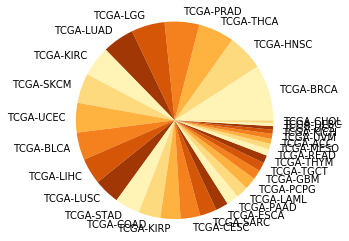

In [62]:
plt.pie(sizes, labels=labels, colors=sns.color_palette("YlOrBr"))
plt.axis('equal')
plt.show()

In [13]:
dfDataClinic['vital_status'].value_counts() 

Alive    7605
Dead     2141
Name: vital_status, dtype: int64

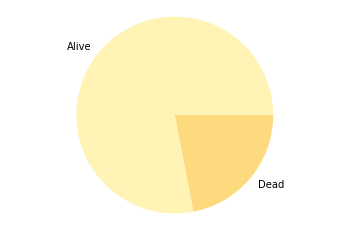

In [63]:
column_values = dfDataClinic['vital_status'].value_counts()
labels = column_values.index
sizes = column_values.values
plt.pie(sizes, labels=labels, colors=sns.color_palette("YlOrBr"))
plt.axis('equal')
plt.show()

## 3. Обработка пропущенных значений

Проверим, есть ли пропущенные значения в таблице с ___бета значениями___.

In [3]:
sumNan = dfDataBeta.isna().sum()
print(sumNan)

CpG
cg00000029       2
cg00000108    9748
cg00000109    9748
cg00000165       0
cg00000236       1
              ... 
rs9363764        0
rs939290         0
rs951295         0
rs966367         0
rs9839873        0
Length: 485577, dtype: int64


Пропущенные значения имеются, уберем их из рассмотрения все CpG сайты, имеющие хотя бы 1 Nan.

In [5]:
columns = dfDataBeta.columns

In [11]:
num_bord = 1
columnNan = []
for column in columns:
    if sumNan[column] > num_bord:
        columnNan.append(column)
        
print(len(columnNan))

148888


In [11]:
len(columnNan)

89512

In [7]:
dfDataBeta = dfDataBeta.drop(columnNan, axis = 1)

In [8]:
dfDataBeta.fillna(dfDataBeta.median(axis = 0), axis=0 , inplace=True)

In [10]:
dfDataBeta.isna().sum()

CpG
cg00000029   NaN
cg00000165   NaN
cg00000236   NaN
cg00000289   NaN
cg00000292   NaN
              ..
rs9363764    NaN
rs939290     NaN
rs951295     NaN
rs966367     NaN
rs9839873    NaN
Length: 396065, dtype: float64

После удаления осталось 269176 CpG-сайтов.

## 4. Предобработка данных 

Из клинических данным понадобится только один признак - тип рака пациента, остальные являются бесполезными (по крайней мере в рамках данной задачи) и не повлияют на классификацию, поэтому удалим остальные из рассмотрения.

Некоторые CpG сайты можно удалить из рассморения, т.к. не несут никакой полезной информации для нас. Это такие CpG, которые имеют ненадежные образцы, CpG сайты, лежащие на хромосомах X и Y, и имеющие общие SNP.

In [ ]:
import warnings
path1 = "D:/Nerobova_Anastasiya/RStudio/Bad_CpG/MultiHit.xlsx"
path2 = "D:/Nerobova_Anastasiya/RStudio/Bad_CpG/NoCG.xlsx"
path3 = "D:/Nerobova_Anastasiya/RStudio/Bad_CpG/SNP.xlsx"
path4 = "D:/Nerobova_Anastasiya/RStudio/Bad_CpG/XY.xlsx"

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    bad_cpg_1 = pd.read_excel(path1, engine="openpyxl", header=None)
    bad_cpg_2 = pd.read_excel(path2, engine="openpyxl", header=None)
    bad_cpg_3 = pd.read_excel(path3, engine="openpyxl", header=None)
    bad_cpg_4 = pd.read_excel(path4, engine="openpyxl", header=None)

list_all = list(bad_cpg_1[0]) + list(bad_cpg_2[0]) + list(bad_cpg_3[0]) + list(bad_cpg_4[0])

In [ ]:
list_delete_cpg = []
for cpg in list(columns):
    if cpg in list_all:
        list_delete_cpg.append(cpg)

In [ ]:
dfDataBeta = dfDataBeta.drop(list_all, axis = 1)

Таким образом из 485577 CpG сайтов осталось для рассмотрения 246607 CpG

В рамках данной задачи исследуется зависимость бета-значений от типа рака. Остальные характеристики из таблицы с клиническими данными пока не требуется. Поэтому для дальнейшего анализа сделаем преобрабтку данных, а именно для каждого пациента совместим  последовательность бета-значений с его типом рака.

In [2]:
dfDataBeta = pd.read_pickle('D:/Nerobova_Anastasiya/RStudio/MatrixBetaNoNan.pkl')

dfDataBeta.head()

CpG,cg00000029,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,cg00000658,cg00000714,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
TCGA-OR-A5LH-01A-11D-A29J-05,0.127235,0.798976,0.906222,0.724104,0.406815,0.202612,0.151666,0.013125,0.832441,0.140646,...,0.791231,0.014351,0.123524,0.971234,0.522766,0.051763,0.861380,0.307426,0.119247,0.941517
TCGA-OR-A5LG-01A-11D-A29J-05,0.046121,0.067993,0.893865,0.754962,0.857653,0.865786,0.560898,0.013004,0.809210,0.070986,...,0.461214,0.013948,0.900690,0.976762,0.017721,0.606996,0.972568,0.030855,0.072948,0.669205
TCGA-OR-A5JQ-01A-11D-A29J-05,0.602064,0.100943,0.897362,0.614677,0.877027,0.255339,0.714194,0.014641,0.814129,0.118062,...,0.020769,0.013826,0.909073,0.256746,0.969041,0.249980,0.512725,0.354050,0.152047,0.942741
TCGA-OR-A5J6-01A-31D-A29J-05,0.117144,0.115994,0.413085,0.584756,0.782867,0.825748,0.123553,0.013132,0.790851,0.060101,...,0.469062,0.973064,0.912584,0.436507,0.445958,0.546527,0.676457,0.040208,0.938875,0.137452
TCGA-OR-A5L6-01A-11D-A29J-05,0.264575,0.143594,0.892213,0.717910,0.834388,0.862202,0.881404,0.014424,0.812025,0.131322,...,0.968430,0.015532,0.896062,0.014142,0.459246,0.935251,0.030863,0.030264,0.056576,0.905967


Перед слиянием проверим, совпадают ли строки таблицы бета-значений и клинических данных.

In [14]:
print(list(dfDataBeta.index.values) == list(dfDataClinic['id_person']))

True


In [13]:
pd.concat([dfDataBeta, dfDataClinic['project']], axis=1, copy=False).to_pickle('D:/Nerobova_Anastasiya/ML/Data.pkl')

У некоторых типов рака людей слишком мало, чтобы хорошо обучить сеть. Поэтому оставим те типы рака, где количество человек болше 200.

Посмотрим, сколько людей болеют тем или иным типом рака:

In [6]:
columns = dfData['project'].unique()

num_bord = 200
columnСancerBed = []
columnСancerUp = []
for column in columns:
    if columnСancer[column] < num_bord:
        columnСancerBed.append(column)
    else:
        columnСancerUp.append(column)


In [66]:
columnСancer = dfDataClinic['project'].value_counts()
columnСancer

TCGA-BRCA    894
TCGA-HNSC    580
TCGA-THCA    571
TCGA-PRAD    552
TCGA-LGG     533
TCGA-LUAD    507
TCGA-KIRC    485
TCGA-SKCM    475
TCGA-UCEC    473
TCGA-BLCA    440
TCGA-LIHC    414
TCGA-LUSC    412
TCGA-STAD    397
TCGA-COAD    351
TCGA-KIRP    321
TCGA-CESC    312
TCGA-SARC    269
TCGA-ESCA    202
TCGA-PAAD    195
TCGA-LAML    194
TCGA-PCPG    187
TCGA-GBM     152
TCGA-TGCT    139
TCGA-THYM    126
TCGA-READ    105
TCGA-MESO     87
TCGA-ACC      80
TCGA-UVM      80
TCGA-KICH     66
TCGA-UCS      57
TCGA-DLBC     47
TCGA-CHOL     45
Name: project, dtype: int64

Оставшиеся типы рака:

In [7]:
columnСancerUp

['TCGA-BLCA',
 'TCGA-BRCA',
 'TCGA-CESC',
 'TCGA-COAD',
 'TCGA-ESCA',
 'TCGA-HNSC',
 'TCGA-KIRC',
 'TCGA-KIRP',
 'TCGA-LGG',
 'TCGA-LIHC',
 'TCGA-LUAD',
 'TCGA-LUSC',
 'TCGA-PRAD',
 'TCGA-SARC',
 'TCGA-SKCM',
 'TCGA-STAD',
 'TCGA-THCA',
 'TCGA-UCEC']

Пациентов с удаленными типами рака удалим из рассмотрения из основной таблицы.

## 5. Обработка категориальных признаков

Признаки в нашй задаче - последовательность бета-значений, которые могут принимать значения от 0 до 1 ( $\beta$ ∈ [0, 1] ). Данные значения являются количественными.

In [8]:
dfData['project'].unique()

array(['TCGA-BLCA', 'TCGA-BRCA', 'TCGA-CESC', 'TCGA-COAD', 'TCGA-ESCA',
       'TCGA-HNSC', 'TCGA-KIRC', 'TCGA-KIRP', 'TCGA-LGG', 'TCGA-LIHC',
       'TCGA-LUAD', 'TCGA-LUSC', 'TCGA-PRAD', 'TCGA-SARC', 'TCGA-SKCM',
       'TCGA-STAD', 'TCGA-THCA', 'TCGA-UCEC'], dtype=object)

Как видно выше, данные о типе рака являются категориальным небинарным признаком. Их необходимо преобразовать в метки. Каждый тип рака будет обозначаться целочисленным числом.

Применим метод векторизации 

In [9]:
columns = dfData['project'].unique()

dicСancerNum = {}

num = 0
for column in columns:
    dicСancerNum[column] = num
    num += 1

markerList = []
for column in list(dfData['project']):
    markerList.append(dicСancerNum[column])


dfData['project'] = dfData['project'].map(dicСancerNum).astype(int)


In [10]:
dicСancerNum

{'TCGA-BLCA': 0,
 'TCGA-BRCA': 1,
 'TCGA-CESC': 2,
 'TCGA-COAD': 3,
 'TCGA-ESCA': 4,
 'TCGA-HNSC': 5,
 'TCGA-KIRC': 6,
 'TCGA-KIRP': 7,
 'TCGA-LGG': 8,
 'TCGA-LIHC': 9,
 'TCGA-LUAD': 10,
 'TCGA-LUSC': 11,
 'TCGA-PRAD': 12,
 'TCGA-SARC': 13,
 'TCGA-SKCM': 14,
 'TCGA-STAD': 15,
 'TCGA-THCA': 16,
 'TCGA-UCEC': 17}

In [24]:
dfData['project'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

## 6. Нормализация количественных признаков

Данные метилирования ДНК (бета-значения) для CpG-сайтов были предварительно обработаны. В предварительную обработку уже входила нормализация данных. 

Подробнее:

Для получения и оценки возможных изменений уровня метилирования ДНК, были использованы чипы Illumina Infinium Human MethylationEPIC BeadChips 850K (EPIC), которые позволяют измерить уровень метилирования на более чем 850 тысячах (850K) CpG-сайтов. Illumina 850K сочетает в себе две разные технологии химического анализа. Infinium I использует два типа зондов (один для метилированного аллеля и один для неметилированного аллеля), но оба сигнала измеряются одним цветом (красным или зеленым). Infinium II использует один тип зонда для обоих аллелей, но метилированные и неметилированные сигналы измеряются зеленым и красным цветом соответственно. Для каждого локуса метилирования регистрируются два представляющих интерес сигнала. Один сигнал измеряет интенсивность метилированной ДНК (Meth), а другой сигнал измеряет интенсивность неметилированной ДНК (Unmeth). Эти значения интенсивности могут быть использованы для определения доли метилирования в каждом локусе CpG. 
Соотношение β=Meth / (Unmeth + Meth) — это коэффициент метилирования, называемый бета-значением в программном обеспечении Illumina, в популяции клеток, из которых извлекается ДНК


Данные, полученные с помощью чипа Illumina Infinium Human MethylationEPIC BeadChips 850K, имеют очень высокое качество. Но из-за того, что два химического состава (Infinium I и Infinium II) имеют разное динамическое поведение в анализе, необходима некоторая обработка данных, чтобы сделать их сопоставимыми. Важнейшими шагами являются: контроль качества для оценки качества набора данных после извлечения; фильтрация зондов для устранения вариаций сигнала, не связанных с различиями в метилировании ДНК или не связанных с биологическим контекстом исследования; коррекция сигнала для настройки цветового баланса и коррекции уровня фона; а также коррекция сдвига Infinium I / Infinium II и нормализация между выборками.

## 7. Разбивка данных на обучающую и тестовую выборки

In [2]:
dfDataBeta = pd.read_pickle('D:/Nerobova_Anastasiya/ML/DataBeta.pkl')
dfTags = pd.read_pickle('D:/Nerobova_Anastasiya/ML/tags_cancer.pkl')

In [3]:
X = dfDataBeta.values
y = dfTags.values

Удаление ненужных файлов.

In [4]:
del(dfDataBeta)


In [5]:
print(X.shape)
print(y.shape)
N, d = X.shape

(8188, 269176)
(8188,)


Разделим даннеы на обучающие и тестовые.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=42,
                                                    stratify=y)

In [13]:
from sklearn.metrics import accuracy_score

In [7]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [308 626 218 246 141 406 339 225 373 290 355 288 386 188 333 278 400 331]
Количество строк в y_test по классам: [132 268  94 105  61 174 146  96 160 124 152 124 166  81 142 119 171 142]


In [7]:
del(X)
del(y)

Обучим несколько моделей и сравним их эффективность.

### Метод k-ближайших соседей (kNN)

Обучим и запустим kNN, подсчитаем метрики.

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [65]:
y_train_pred = knn.predict(X_train)

In [66]:
y_test_predict_knn = knn.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

precision_score(y_test, y_test_predict_knn, average="macro")

C:\Users\aging\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.847577317015279

In [68]:
recall_score(y_test, y_test_predict_knn, average="macro")

0.8111173492384157

In [69]:
f1_score(y_test, y_test_predict_knn, average="macro")

0.813041480417565

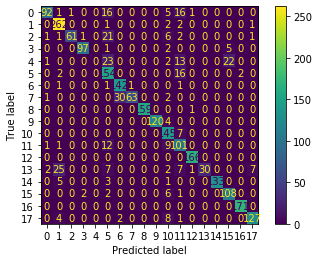

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_test_predict_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn.classes_)
disp.plot()
plt.show()

Ошибка на обучающих данных:

In [72]:
err_train = np.mean(y_train != y_train_pred)

In [73]:
err_train

0.12563252486477056

Ошибка на тестовых данных:

In [74]:
err_test  = np.mean(y_test != y_test_predict_knn)
err_test

In [75]:
err_test

0.1326821326821327

### Дерево решений (DecisionTreeClassifier)

Обучим и запустим DecisionTreeClassifier, подсчитаем метрики.

In [8]:
from sklearn.tree import DecisionTreeClassifier

logreg_clf = DecisionTreeClassifier()
logreg_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_train_pred_clf = logreg_clf.predict(X_train)

In [13]:
y_test_predict_clf = logreg_clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

precision_score(y_test, y_test_predict_clf, average="macro")

0.8426412004894607

In [16]:
recall_score(y_test, y_test_predict_clf, average="macro")

0.8439987513809712

In [15]:
f1_score(y_test, y_test_predict_clf, average="macro")

0.8429245341162541

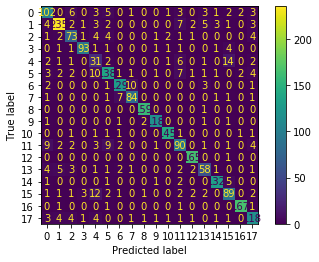

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_test_predict_clf, labels=logreg_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=logreg_clf.classes_)
disp.plot()
plt.show()

Ошибка на обучающих данных:

In [19]:
err_train = np.mean(y_train != y_train_pred_clf)
err_train

0.0

Ошибка на тестовых данных:

In [20]:
err_test  = np.mean(y_test != y_test_predict_clf)
err_test

0.13471713471713473

### Наивный метод Байеса (GaussianNB)

Обучим и запустим GaussianNB, подсчитаем метрики.

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [22]:
y_train_pred_gnb = gnb.predict(X_train)

In [23]:
y_test_predict_gnb = gnb.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

precision_score(y_test, y_test_predict_gnb, average="macro")

0.8659946965329923

In [25]:
recall_score(y_test, y_test_predict_gnb, average="macro")

0.8537470785441287

In [26]:
f1_score(y_test, y_test_predict_gnb, average="macro")

0.8549795648183429

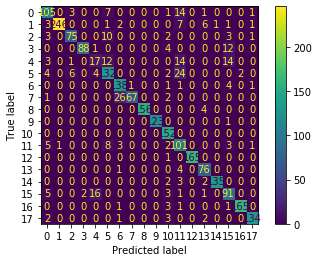

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_test_predict_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=gnb.classes_)
disp.plot()
plt.show()

Ошибка на обучающих данных:

In [28]:
err_train = np.mean(y_train != y_train_pred_gnb)
err_train

0.07154074332577212

Ошибка на тестовых данных:

In [29]:
err_test  = np.mean(y_test != y_test_predict_gnb)
err_test

0.11843711843711843

### Линейный дискриминантный анализ

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [9]:
y_train_pred_clf = clf.predict(X_train)

In [10]:
y_test_predict_clf = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

precision_score(y_test, y_test_predict_clf, average="macro")

0.9582730337489941

In [12]:
recall_score(y_test, y_test_predict_clf, average="macro")

0.9429479675780501

In [13]:
f1_score(y_test, y_test_predict_clf, average="macro")

0.9481427729966779

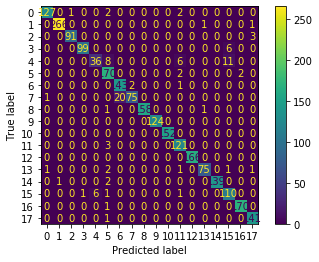

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_test_predict_clf, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

Ошибка на обучающих данных:

In [15]:
err_train = np.mean(y_train != y_train_pred_clf)
err_train

0.026696911533763742

Ошибка на тестовых данных:

In [16]:
err_test  = np.mean(y_test != y_test_predict_clf)
err_test

0.03825803825803826

## 8. Вывод

Для метода k-ближайших соседей ошибка на обучающей выборке = 0.1256325248, на тестовой = 0.1326821326;  Точность (precision) метода = 0.8475773, полнота (recall) = 0.81111734

Для дерева решений ошибка на обучающей выборке = 0.0, на тестовой = 0.13471713;  Точность (precision) метода = 0.84264120, полнота (recall) = 0.843998751

Для наивного метода Байеса ошибка на обучающей выборке = 0.07154074, на тестовой = 0.11843711;  Точность (precision) метода = 0.86599469, полнота (recall) = 0.853747078

Для линейного дискриминантного анализа ошибка на обучающей выборке = 0.026696911, на тестовой = 0.038258038;  Точность (precision) метода = 0.958273033, полнота (recall) = 0.94294796

Лучший результат показали классификатор линейный дискриминантный анализ. Его ошибка на тестовой выборке = 0.038258038, а такие метрики как точность и полнота больше, чем у других классификаторов.

# Нейронная сеть

## Обучаем классификатор

In [10]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(alpha = 1, 
                              hidden_layer_sizes = (3,),
                              solver = 'lbfgs', 
                              max_iter = 25, 
                              activation = 'logistic',
                              random_state = 42)

## Подбор гиперпараметров

In [63]:
alpha_arr = np.logspace(-3, 2, 10)

In [37]:
test_err = []
train_err = []
train_acc = []
test_acc = []

In [70]:
alpha_arr = alpha_arr[:5]

In [71]:
alpha_arr

array([0.001     , 0.00359381, 0.0129155 , 0.04641589, 0.16681005])

In [73]:
%%time
for alpha in alpha_arr:
    print(alpha)
    mlp_model = MLPClassifier(alpha = alpha, 
                              hidden_layer_sizes = (3,),
                              solver = 'lbfgs', 
                              max_iter = , 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
Wall time: 23min 15s


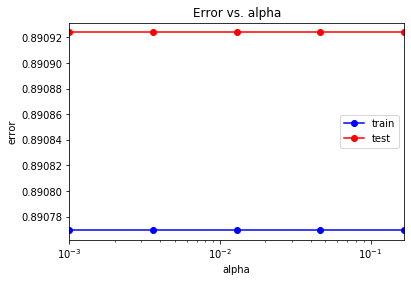

In [74]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

## Изменение метрики в зависимости от гиперпараметра:

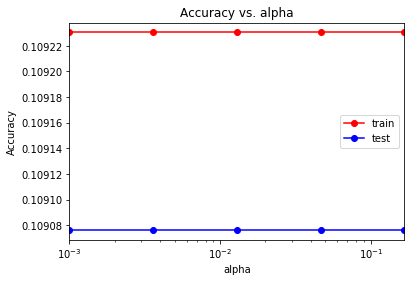

In [75]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [76]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.8907694992147968 0.8909238909238909


Оптимальное значение alpha:

In [77]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.001      0.00359381 0.0129155  0.04641589 0.16681005]


In [ ]:
alpha_opt = alpha_opt[0]
alpha_opt

Т.к. минимальное значение ошибки находитмя при alpha = 0.001, попробуем взять несколько точек слева.

In [84]:
alpha_arr = np.logspace(-4, -3, 5)

In [87]:
alpha_arr

array([0.0001    , 0.00017783, 0.00031623, 0.00056234, 0.001     ])

In [88]:
test_err = []
train_err = []
train_acc = []
test_acc = []

In [90]:
%%time
for alpha in alpha_arr:
    print(alpha)
    mlp_model = MLPClassifier(alpha = alpha, 
                              hidden_layer_sizes = (3,),
                              solver = 'lbfgs', 
                              max_iter = 25, 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

0.0001
0.00017782794100389227
0.00031622776601683794
0.0005623413251903491
0.001
Wall time: 23min 37s


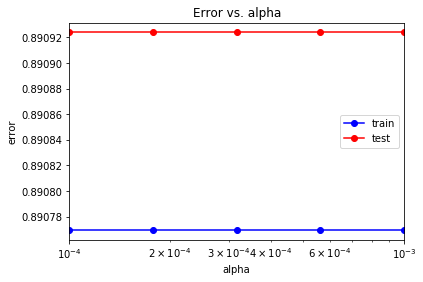

In [91]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

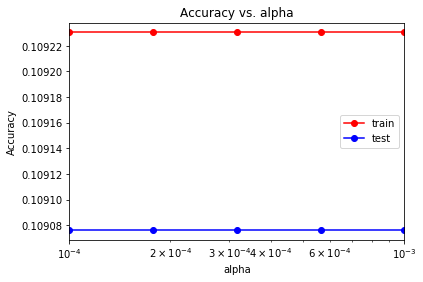

In [96]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [97]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.8907694992147968 0.8909238909238909


In [99]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
alpha_opt

0.0001

Классификатор при найденном оптимальном значении alpha:

In [ ]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

Матрица рассогласования:

In [ ]:
plot_confusion_matrix(mlp_model, X_test, y_test) 

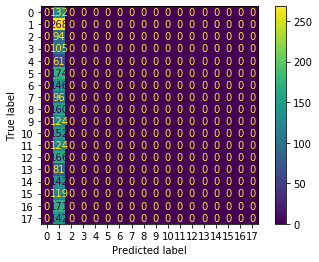

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_test_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=mlp_model.classes_)
disp.plot()
plt.show()

In [93]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_miss, Y_train_miss = nm.fit_resample(X_train, y_train.ravel())


In [94]:
sum(Y_train_miss == 0)

141

In [95]:
sum(Y_train_miss == 12)

141

In [100]:
mlp_model = MLPClassifier(hidden_layer_sizes = (10,),
                          solver = 'lbfgs', 
                          activation = 'relu',
                          random_state = 42)

In [ ]:
%%time
mlp_model.fit(X_train_miss, Y_train_miss)

In [52]:
y_train_pred

array([12, 12, 12, ..., 12, 12, 12])

In [50]:
y_train_pred = mlp_model.predict(X_train_miss)
y_test_pred = mlp_model.predict(X_test)

In [51]:
print(np.mean(Y_train_miss != y_train_pred), np.mean(y_test != y_test_pred))

0.9444444444444444 0.9324379324379325


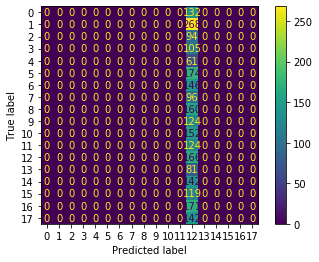

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_test_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=mlp_model.classes_)
disp.plot()
plt.show()